# Week 12 Handson - Assignment/Project 2: Regression #02

As the previous assignment, the objective of this project is to explore your capability as data analyst. You are challenged to implement data mining methods, given a raw dataset. Then, you need to propose several regression methods for the data, analyze and evaluate it. 

Basic tasks you need to perform in this project: (Note: you can add additional tasks that you think necessary for this project)

1.	Build regression models to predict the price for second hand cars. This step should include EDA, pre-processing, creating model and evaluation. You may use several regression methods, do benchmarking, employ additional techniques, such as ensemble method, to improve the prediction accuracy, etc.
2.	Please use the most appropriate evaluation metrics for this regression project.

Deadline: 17 November 2020, 11:59 a.m. 
 
Deliverables: 
1. Jupyter notebook (your code)
2.	Presentation <br>
**Nb**: In the end of slide and report, please write members’ names and their own contribution during this project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Read dataset

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dsdmw12/data.csv


In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/dsdmw12/data.csv')
print('Shape:', df.shape)
df.head()

# credit to prev. year DSDM students: Felix Septianus Darmawan, Maulana Akmal, Steven Sukma limanus, Ricky Kennedy

Shape: (36575, 20)


,Tahun,Kapasitas mesin,Warna,Tipe bodi,Varian,STATE,Merek,Transmisi,Model,Fitur tambahan,Nama Bursa Mobil,Tipe bahan bakar,Tipe Penjual,CITY,COUNTRY,Jarak tempuh,phone,Sistem Penggerak,price,NEIGHBOURHOOD
0,2008,>1.500 - 2.000 cc,Abu-abu,Pick-up,G Luxury,Jawa Barat,Toyota,Automatic,Innova,"['Sensor Parkir', 'Electric Window']",NaN,Bensin,Individu,Bandung Kota,Indonesia,120.000-125.000,6.282282e+12,Rear Wheel Drive (RWD),125000000,Bojongloa Kidul
1,2018,>1.000 - 1.500 cc,Silver,Hatchback,E CVT,Jakarta D.K.I.,Honda,Automatic,HR-V,"['Airbag', 'Bluetooth Audio', 'Electric Window...",Bursa Mobil Blok M Square,Bensin,Diler,Jakarta Selatan,Indonesia,10.000-15.000,6.289655e+12,4X2,240000000,Kebayoran Baru
2,2017,>1.000 - 1.500 cc,Putih,Hatchback,Panca T,Sumatra Selatan,Datsun,Manual,Go,"['Airbag', 'Electric Window', 'Sensor Parkir']",NaN,Bensin,Diler,Palembang Kota,Indonesia,15.000-20.000,6.281279e+12,Front Wheel Drive (FWD),80000000,Kemuning
3,2013,>1.000 - 1.500 cc,Silver,NaN,E,Jawa Timur,Honda,Automatic,Freed,NaN,NaN,Bensin,NaN,Surabaya Kota,Indonesia,85.000-90.000,6.283832e+12,NaN,170000000,Gubeng
4,2016,>1.000 - 1.500 cc,Putih,MPV,GL Sporty,Jakarta D.K.I.,Suzuki,Manual,Ertiga,"['Airbag', 'Electric Window', 'Sensor Parkir']",Bursa Mobil MGK Kemayoran,Bensin,Diler,Jakarta Pusat,Indonesia,60.000-65.000,6.281912e+12,4X2,125000000,Kemayoran


In [4]:
display(df.shape)
display(df.describe())
display(df.info())

(36575, 20)

,phone,price
count,3.404300e+04,3.657500e+04
mean,5.926282e+12,1.712408e+08
std,5.689054e+12,5.410271e+08
min,6.281110e+10,1.234500e+04
25%,6.281268e+12,8.500000e+07
50%,6.281703e+12,1.200000e+08
75%,6.285215e+12,1.747250e+08
max,6.289581e+13,8.975000e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36575 entries, 0 to 36574
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tahun             36575 non-null  object 
 1   Kapasitas mesin   32192 non-null  object 
 2   Warna             36575 non-null  object 
 3   Tipe bodi         30986 non-null  object 
 4   Varian            34989 non-null  object 
 5   STATE             36575 non-null  object 
 6   Merek             36575 non-null  object 
 7   Transmisi         36575 non-null  object 
 8   Model             36575 non-null  object 
 9   Fitur tambahan    24915 non-null  object 
 10  Nama Bursa Mobil  4959 non-null   object 
 11  Tipe bahan bakar  36575 non-null  object 
 12  Tipe Penjual      30141 non-null  object 
 13  CITY              36575 non-null  object 
 14  COUNTRY           36575 non-null  object 
 15  Jarak tempuh      36575 non-null  object 
 16  phone             34043 non-null  float6

None

## Pre-processing

Check Variance of every features

In [5]:
for column_name in df:
    print('-------',column_name,'-------')
    print(df[column_name].value_counts())
    
for column_name in df:
    print('-------',column_name,'-------')
    uniques = df[column_name].unique()
    print('Uniques:',len(uniques))
    print('uniques/len:', len(uniques)/len(df[column_name]))
    print(uniques[:5])

------- Tahun -------
2014     3276
2013     3233
2012     2867
2016     2788
2015     2752
2017     2195
2011     2157
2010     1977
2018     1733
2008     1601
2019     1177
2009     1166
2005     1112
2007     1093
2004      995
2006      763
2003      715
2001      598
2000      583
2002      563
1997      501
1996      345
1995      331
<1986     325
1994      320
1993      207
1991      200
1990      187
1992      170
1998      161
1999      142
1989      106
1986       85
1988       78
1987       73
Name: Tahun, dtype: int64
------- Kapasitas mesin -------
>1.000 - 1.500 cc    15778
>1.500 - 2.000 cc     7220
>2.000 - 3.000 cc     6804
<1.000 cc             1396
>3.000 cc              994
Name: Kapasitas mesin, dtype: int64
------- Warna -------
Hitam      10591
Putih       7162
Silver      6832
Abu-abu     4393
Merah       2128
Biru        1909
Hijau        838
Lainnya      675
Coklat       620
Marun        455
Kuning       336
Oranye       275
Emas         246
Ungu         115

Drop irrelevant feature

In [6]:
df.drop(['phone'], axis='columns', inplace=True)
df.drop(['NEIGHBOURHOOD', 'STATE', 'CITY', 'Nama Bursa Mobil'], axis='columns', inplace=True)

Drop columns with low uniques count

In [7]:
df.drop(['COUNTRY'], axis='columns', inplace=True)

Remove rows with missing values

In [8]:
display(df.isna().sum())

Tahun                   0
Kapasitas mesin      4383
Warna                   0
Tipe bodi            5589
Varian               1586
Merek                   0
Transmisi               0
Model                   0
Fitur tambahan      11660
Tipe bahan bakar        0
Tipe Penjual         6434
Jarak tempuh            0
Sistem Penggerak     7793
price                   0
dtype: int64

Missing value percentage

In [9]:
miss_percent = (df.isnull().sum() / len(df)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
Fitur tambahan,31.879699,11660
Sistem Penggerak,21.306904,7793
Tipe Penjual,17.591251,6434
Tipe bodi,15.280930,5589
Kapasitas mesin,11.983595,4383
Varian,4.336295,1586


Low Missing value percentage columns could be imputed instead of dropped to avoid losing data volume

In [10]:
df_ = df.dropna().copy()
display(df_.isna().sum())

Tahun               0
Kapasitas mesin     0
Warna               0
Tipe bodi           0
Varian              0
Merek               0
Transmisi           0
Model               0
Fitur tambahan      0
Tipe bahan bakar    0
Tipe Penjual        0
Jarak tempuh        0
Sistem Penggerak    0
price               0
dtype: int64

In [11]:
display(df_.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19869 entries, 0 to 36574
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tahun             19869 non-null  object
 1   Kapasitas mesin   19869 non-null  object
 2   Warna             19869 non-null  object
 3   Tipe bodi         19869 non-null  object
 4   Varian            19869 non-null  object
 5   Merek             19869 non-null  object
 6   Transmisi         19869 non-null  object
 7   Model             19869 non-null  object
 8   Fitur tambahan    19869 non-null  object
 9   Tipe bahan bakar  19869 non-null  object
 10  Tipe Penjual      19869 non-null  object
 11  Jarak tempuh      19869 non-null  object
 12  Sistem Penggerak  19869 non-null  object
 13  price             19869 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 2.3+ MB


None

Handle Outlier Price 

In [12]:
miss_percent = (df_.isnull().sum() / len(df_)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count


Drop duplicates:

In [13]:
df_2 = df_.drop_duplicates(keep="first", inplace=False)
display(df_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19693 entries, 0 to 36574
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tahun             19693 non-null  object
 1   Kapasitas mesin   19693 non-null  object
 2   Warna             19693 non-null  object
 3   Tipe bodi         19693 non-null  object
 4   Varian            19693 non-null  object
 5   Merek             19693 non-null  object
 6   Transmisi         19693 non-null  object
 7   Model             19693 non-null  object
 8   Fitur tambahan    19693 non-null  object
 9   Tipe bahan bakar  19693 non-null  object
 10  Tipe Penjual      19693 non-null  object
 11  Jarak tempuh      19693 non-null  object
 12  Sistem Penggerak  19693 non-null  object
 13  price             19693 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 2.3+ MB


None

Reconstruct year to age of car

In [14]:
df_2["Tahun"] = df_2["Tahun"].str.replace("<", "")
# for x in df_2['Tahun']:
#     if '<1986' in x:
#         print(x)
df_2["umur_mobil"] = 2020 - df_2["Tahun"].astype(int)
df_2.drop(['Tahun'], axis='columns', inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

add new column after taking logarithm for the dependent variable to avoid high skewness & kurtosis

In [15]:
df_2['price_upd'] = np.log1p(df_2['price'].values)
df_2.drop(columns=['price'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Categorical to Numerical Conversion

In [16]:
from sklearn.preprocessing import LabelEncoder

categ_cols = ['Warna', 'Kapasitas mesin', 'Tipe bodi', 'Varian', 'Merek', 'Model', 'Fitur tambahan',
              'Tipe bahan bakar', 'Tipe Penjual', 'Transmisi',
          'Jarak tempuh', 'Sistem Penggerak']

# Label Encoding non-numerical feature
df_encoded = df_2.copy()
for col_name in categ_cols:
    le = LabelEncoder()
    le.fit(df_2[col_name])
    df_encoded[col_name] = le.transform(df_2[col_name]) 
    
df_encoded.head()

,Kapasitas mesin,Warna,Tipe bodi,Varian,Merek,Transmisi,Model,Fitur tambahan,Tipe bahan bakar,Tipe Penjual,Jarak tempuh,Sistem Penggerak,umur_mobil,price_upd
0,2,0,11,349,51,0,195,1879,0,1,6,4,12,18.643824
1,1,12,6,296,20,0,189,147,0,0,1,0,2,19.296149
2,1,11,6,469,11,2,171,385,0,0,12,3,3,18.197537
4,1,11,8,360,48,2,124,385,0,0,52,0,4,18.643824
8,1,11,9,649,51,0,43,337,0,1,7,0,8,18.603002


In [17]:
from sklearn.preprocessing import OneHotEncoder

onehot_cols = []

for col in onehot_cols:
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(df_encoded[col].values.reshape(-1,1))
    temp = pd.DataFrame(enc.transform(df_encoded[col].values.reshape(-1,1)).toarray()).add_prefix(col)
    df_encoded = df_encoded.join(temp)
    
df_encoded.drop(onehot_cols, axis='columns', inplace=True)
df_encoded.head()

,Kapasitas mesin,Warna,Tipe bodi,Varian,Merek,Transmisi,Model,Fitur tambahan,Tipe bahan bakar,Tipe Penjual,Jarak tempuh,Sistem Penggerak,umur_mobil,price_upd
0,2,0,11,349,51,0,195,1879,0,1,6,4,12,18.643824
1,1,12,6,296,20,0,189,147,0,0,1,0,2,19.296149
2,1,11,6,469,11,2,171,385,0,0,12,3,3,18.197537
4,1,11,8,360,48,2,124,385,0,0,52,0,4,18.643824
8,1,11,9,649,51,0,43,337,0,1,7,0,8,18.603002


Check feature correlation

In [18]:
# data_train correlation
corr = df_encoded.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Kapasitas mesin,Warna,Tipe bodi,Varian,Merek,Transmisi,Model,Fitur tambahan,Tipe bahan bakar,Tipe Penjual,Jarak tempuh,Sistem Penggerak,umur_mobil,price_upd
Kapasitas mesin,1.00,-0.08,0.28,-0.19,0.08,-0.20,0.00,-0.04,0.48,-0.04,-0.06,-0.06,0.17,0.39
Warna,-0.08,1.00,-0.06,0.05,0.02,-0.01,0.01,-0.03,-0.01,-0.06,0.06,-0.01,-0.17,0.09
Tipe bodi,0.28,-0.06,1.00,-0.16,-0.00,-0.03,-0.02,0.04,0.04,0.06,-0.07,0.01,0.22,-0.00
Varian,-0.19,0.05,-0.16,1.00,0.01,0.02,0.10,-0.01,-0.02,-0.03,0.03,0.01,-0.16,0.01
Merek,0.08,0.02,-0.00,0.01,1.00,0.01,-0.16,0.01,0.09,-0.00,-0.01,-0.05,0.01,0.03
Transmisi,-0.20,-0.01,-0.03,0.02,0.01,1.00,0.02,0.15,-0.00,0.18,-0.07,0.00,0.19,-0.32
Model,0.00,0.01,-0.02,0.10,-0.16,0.02,1.00,0.01,0.07,0.01,-0.01,-0.01,0.00,0.03
Fitur tambahan,-0.04,-0.03,0.04,-0.01,0.01,0.15,0.01,1.00,0.01,0.14,-0.06,-0.05,0.23,-0.20
Tipe bahan bakar,0.48,-0.01,0.04,-0.02,0.09,-0.00,0.07,0.01,1.00,-0.04,-0.01,-0.11,-0.03,0.27
Tipe Penjual,-0.04,-0.06,0.06,-0.03,-0.00,0.18,0.01,0.14,-0.04,1.00,-0.13,-0.02,0.26,-0.27


Check which features influence the most for price

In [19]:
corr.loc[:,'price_upd'].abs().sort_values(ascending=False)[1:]

umur_mobil          0.631105
Kapasitas mesin     0.385482
Transmisi           0.316246
Tipe Penjual        0.273805
Tipe bahan bakar    0.268020
Fitur tambahan      0.203172
Jarak tempuh        0.159381
Warna               0.090323
Merek               0.031032
Model               0.028706
Varian              0.013343
Sistem Penggerak    0.009314
Tipe bodi           0.002670
Name: price_upd, dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
data_std = std.fit_transform(df_encoded)
df_encoded = pd.DataFrame(data_std, columns = df_encoded.columns)

In [21]:
df_final = df_encoded.copy()

## Modelling

In [22]:
y = df_final['price_upd']
X = df_final.drop(['price_upd'], axis='columns', inplace=False)

In [23]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

# Percent of the X array to use as training set. This implies that the rest will be test set
test_size = 0.22

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

r = range(2003, 2017)
km_year = 10000

(15360, 13) (4333, 13) (15360,) (4333,)


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


## Inference

In [25]:
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

LiR=LinearRegression()
LiR.fit(X_train,y_train)
pred1=LiR.predict(X_val)
print('r2 Score of LinearRegression Model: ', r2_score(y_val,pred1))
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,pred1)))

svr=SVR()
svr.fit(X_train,y_train)
pred3=svr.predict(X_val)
print('r2 Score of SVR: ', r2_score(y_val,pred3))
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,pred3)))

gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
pred7=gbr.predict(X_val)
print('r2 Score of GradientBoostingRegressor: ', r2_score(y_val,pred7))
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,pred7)))

xgb=XGBRegressor()
xgb.fit(X_train,y_train)
pred8=xgb.predict(X_val)
print('r2 Score of XGBRegressor: ', r2_score(y_val,pred8))
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,pred8)))

r2 Score of LinearRegression Model:  0.6674545966777521
Root mean squared error :  0.5709169869019186
r2 Score of SVR:  0.7991905876193861
Root mean squared error :  0.4436490165845092
r2 Score of GradientBoostingRegressor:  0.8227022462541018
Root mean squared error :  0.4168685265174814
r2 Score of XGBRegressor:  0.8965183845300023
Root mean squared error :  0.3184777457067633


In [26]:
cb = CatBoostRegressor()

param_grid = { "learning_rate" : [0.01, 0.05, 0.1]
              , "depth" : [6, 8, 10]
              , "iterations" : [200, 400, 600]
              , "loss_function": ["RMSE"]}

gs_cb = GridSearchCV(estimator=cb, param_grid=param_grid, cv=2, n_jobs=-1, verbose=False)
gs_cb = gs_cb.fit(X_train, y_train, verbose=False)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [27]:
print(gs_cb.best_score_)
print(gs_cb.best_params_)

0.8888711853800769
{'depth': 8, 'iterations': 600, 'learning_rate': 0.1, 'loss_function': 'RMSE'}


In [28]:
bp_cb = gs_cb.best_params_
cb = CatBoostRegressor(learning_rate=bp_cb['learning_rate'],
                              depth=bp_cb['depth'],
                              iterations=bp_cb['iterations'],
                              loss_function=bp_cb['loss_function'],
                              logging_level="Silent")
cb.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction

print('Score: %.2f' % cb.score(X_val, y_val))
y_pred = cb.predict(X_val)
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,y_pred)))

Score: 0.91
Root mean squared error :  0.30305856967706085


In [29]:
rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3, 5]
              , "min_samples_split" : [3, 5]
              , "max_depth": [10, 20, 30]
              , "n_estimators": [500, 200, 100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.0min finished


In [30]:
print(gs.best_score_)
print(gs.best_params_)

0.8499078324276358
{'criterion': 'mse', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 500}


In [31]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_val, y_val))
f_pred = forest.predict(X_val)
print("Root mean squared error : ", sqrt(mean_squared_error(y_val,f_pred)))

Score: 0.87
Root mean squared error :  0.3518737187476514


## Feature Importance Rank

Feature ranking:
1. feature 12 - umur_mobil (0.480472)
2. feature 0 - Kapasitas mesin (0.260214)
3. feature 6 - Model (0.057685)
4. feature 4 - Merek (0.045976)
5. feature 3 - Varian (0.041374)
6. feature 5 - Transmisi (0.036651)
7. feature 10 - Jarak tempuh (0.021749)
8. feature 2 - Tipe bodi (0.019618)
9. feature 7 - Fitur tambahan (0.017713)
10. feature 11 - Sistem Penggerak (0.007463)
11. feature 1 - Warna (0.005658)
12. feature 8 - Tipe bahan bakar (0.004002)
13. feature 9 - Tipe Penjual (0.001424)


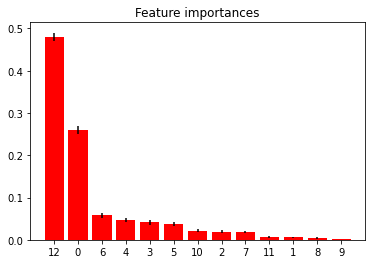

In [32]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

columns = X_train.columns.values

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()